In [145]:
import pandas as pd
import numpy as np
#import import_ipynb
import matplotlib.pyplot as plt
import BRKGA as brkga
import DataLoad as dl

In [137]:
data = dl.DataLoad()
params = pd.read_json("params.json",dtype={"N":int,"M":int,"P":int,"Elite":int,"Mutant":int,"K":int, "S":str,"Type":bool,"City":list,"Cost":list,"Cover":list})
_relation = pd.DataFrame()
_relation['City'] = pd.Series(params["City"]["Value"])
_relation["Cover"] = pd.Series(params["Cover"]["Value"])
_relation["Cost"] = pd.Series(params["Cost"]["Value"])

In [138]:
facilities_cost = []
facilities_cover = []

for i in _relation["Cost"].values:
    facilities_cost.append(i.copy())

for i in _relation["Cover"].values:
    facilities_cover.append(i.copy())

In [139]:
for i in range(0,params["N"]["Value"]):
    location = _relation["City"][i]
    state = location.split('-')[0]
    city_id = int(location.split('-')[1])
    
    redundance = _relation["City"].value_counts()[_relation["City"].value_counts().index == location][location]
    density = data.DemographicData[state].loc[city_id]["Density"]
    
    facilities_cover[i]= facilities_cover[i]/density*redundance
    facilities_cost[i] = facilities_cost[i]*redundance/density

In [141]:
Heuristic = brkga.BRKGA(facilities_cover,facilities_cost,
                        params["M"]["Value"],params["P"]["Value"],
                        params["Elite"]["Value"],params["Mutant"]["Value"],
                        params["K"]["Value"],params["Type"]["Value"])

In [142]:
solutions, facilities = Heuristic.Solve()

In [143]:
best_solutions = Heuristic.getObjectiveEvolution()

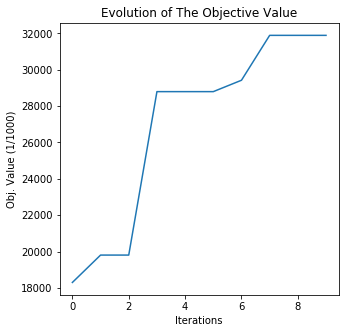

In [144]:
Fig = plt.figure(figsize=(5,5),)
plt.plot(range(0,params["K"]["Value"]),pd.Series(best_solutions),figure=Fig)
plt.xlabel("Iterations")
plt.ylabel("Obj. Value (1/1000)")
plt.title("Evolution of The Objective Value")
Fig.savefig("Exit/Evolution_"+params["S"]["Value"]+".png")

In [86]:
exit_data = pd.DataFrame(facilities)
exit_data["obj_value"] = solutions
exit_data["final_cost"] = 0
exit_data["final_cover"] = 0

for i in exit_data.index:
    cover = 0
    cost = 0
    for j in exit_data.loc[i][:params["M"]["Value"]]:
        cost += _relation["Cost"][j]
        cover += _relation["Cover"][j]
        
    exit_data.loc[i,"final_cost"] = cost
    exit_data.loc[i,"final_cover"] = cover
    
for i in range(len(facilities)):
    for j in range(len(facilities[i])):
        exit_data.loc[i,j] = _relation["City"][facilities[i][j]]

exit_data = exit_data.sort_values("obj_value",ascending=False)    
#exit_data.to_csv("Exit/Solution"+str(params["S"]["Value"]+".csv")
exit_data.to_json("Exit/Solution_"+params["S"]["Value"]+".json")